COS80024

DATA SCIENCE PROJECT 1

PROJECT 4: MOVIE RECOMMENDATION SYSTEM

# S2.3.1: Data Filtering (Executor: Promita)

This task aims to address data wrangling and data cleaning steps needed.

Task Leader: Promita

# All necessary modules are being imported.

In [1]:
#Importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from ast import literal_eval

# The required datasets are uploaded as dataframes.

In [2]:
#Loading files

#File 1: uploading the file "movies_metadata"
metadata = pd.read_csv('movies_metadata.csv')

#File 2: uploading the file "datasets_links_small"
links = pd.read_csv('datasets_links_small.csv')

#File 3: uploading the file "ratings_small"
ratings = pd.read_csv('ratings_small.csv')

C:\Users\Promita\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Attributes that are not required in the project are removed from the dataframes "metadata" and "ratings".

In [3]:
#Feature removal from "metadata"
metadata = metadata.drop(['adult','homepage','poster_path','original_title'], axis=1)
#Checking to see if all the necessary columns are there
print("Shape")
print(metadata.shape)
print('Column Headers')
for col in metadata.columns:
    print(col)

Shape
(45466, 20)
Column Headers
belongs_to_collection
budget
genres
id
imdb_id
original_language
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


In [4]:
metadata = metadata.rename(columns={'id': 'tmdbId'})
print('Column Headers')
for col in metadata.columns:
    print(col)

Column Headers
belongs_to_collection
budget
genres
tmdbId
imdb_id
original_language
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


In [5]:
#Feature removal from "ratings"
ratings = ratings.drop(['timestamp'], axis=1)
#Checking to see if all the necessary columns are there
print("Shape")
print(ratings.shape)
print('Column Headers')
for col in ratings.columns:
    print(col)

Shape
(100004, 3)
Column Headers
userId
movieId
rating


In [6]:
df = ratings.groupby(['userId', 'movieId']).agg({'rating': ['mean']})

In [7]:
df.columns = ['mean_rating']
df = df.reset_index()

In [8]:
df.sort_values(by=['movieId'])

,userId,movieId,mean_rating
9713,68,1,4.0
35933,261,1,1.5
52631,383,1,5.0
35983,262,1,2.5
12038,77,1,4.0
...,...,...,...
39546,287,161944,5.0
11823,73,162376,4.5
92339,611,162542,5.0
92340,611,162672,3.0


Next, attributes in "metadata" are cleaned - transforming and removing as necessary. 

# Changing datatypes

In [9]:
#Function to convert to float manually
def to_float(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

#Apply the to_float function to all values in the budget and popularity columns
metadata['budget'] = metadata['budget'].apply(to_float)
metadata['popularity'] = metadata['popularity'].apply(to_float)

print(metadata.dtypes)

belongs_to_collection     object
budget                   float64
genres                    object
tmdbId                    object
imdb_id                   object
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object


The attributes are cleaned in the following order:

1. belongs_to_collection

2. budget

3. popularity

4. revenue

5. runtime

6. vote_average

7. vote_count

8. release_date [transformed to year]

9. id [tmdbid and imdbid]

10. status

11. video

12. original_language

13. overview

14. tagline

15. title

16. spoken_languages

17. genres

18. production_companies

19. production_countries

# Attribute: belongs_to_collection

In [10]:
df = metadata['belongs_to_collection']
df.head()

0    {'id': 10194, 'name': 'Toy Story Collection', ...
1                                                  NaN
2    {'id': 119050, 'name': 'Grumpy Old Men Collect...
3                                                  NaN
4    {'id': 96871, 'name': 'Father of the Bride Col...
Name: belongs_to_collection, dtype: object

In [11]:
df = df.to_frame()

In [12]:
# Removing the second bracket from the dataframe
df['belongs_to_collection'] = df['belongs_to_collection'].str.strip('{}')

In [13]:
# Splitting the string values 
temp = df.belongs_to_collection.str.split(':',expand=True)
temp[1] = temp[1].str.split(',',expand=True)
temp[2] = temp[2].str.split(',',expand=True)

In [14]:
# Storing the collecton Id and removing the ',' from the Ids
df_collection = pd.DataFrame() 
df_collection['collectionId']= temp[1]
df_collection['collectionName']= temp[2]

In [15]:
# Merging the extracted collection ID with the metadata file
metadata = metadata.merge(df_collection,left_index=True, right_index=True)
# Removing belongs_to_collection
metadata = metadata.drop(['belongs_to_collection'], axis=1)

In [16]:
metadata['collectionId'].isnull().sum()

40975

In [17]:
metadata['collectionName'].isnull().sum()

40975

In [18]:
# Missing values set to "-99"
metadata.loc[:,'collectionId'].fillna('-99',inplace=True)

In [19]:
# Missing values set to "unknown"
metadata.loc[:,'collectionName'].fillna('unknown',inplace=True)

In [20]:
metadata['collectionId'].isnull().sum()

0

In [21]:
metadata['collectionName'].isnull().sum()

0

# Attribute: budget

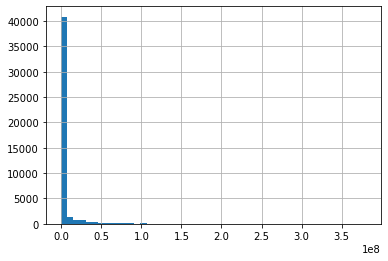

3


In [22]:
#Before cleaning
metadata.loc[:,'budget'].hist(bins=50)
plt.show()
print(metadata.budget.isnull().sum())

In [23]:
metadata.budget.describe()

count    4.546300e+04
mean     4.224579e+06
std      1.742413e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [24]:
metadata.budget.value_counts()

0.0           36573
5000000.0       286
10000000.0      259
20000000.0      243
2000000.0       242
              ...  
4490331.0         1
313411.0          1
1020000.0         1
37.0              1
9500.0            1
Name: budget, Length: 1223, dtype: int64

This attribute has too many values (80%) that are 0 (impossible value). Hence, budget will be removed as a feature. 

In [25]:
#Feature removal from "metadata"
metadata = metadata.drop(['budget'], axis=1)
#Checking to see if all the necessary columns are there
print("Shape")
print(metadata.shape)
print('Column Headers')
for col in metadata.columns:
    print(col)

Shape
(45466, 20)
Column Headers
genres
tmdbId
imdb_id
original_language
overview
popularity
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count
collectionId
collectionName


# Attribute: popularity

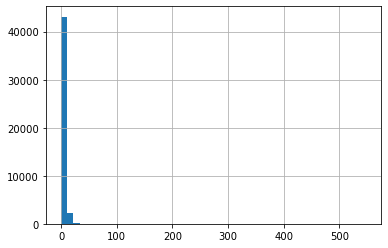

6

In [26]:
#Before cleaning
metadata.loc[:,'popularity'].hist(bins=50)
plt.show()
metadata.popularity.isnull().sum()

In [27]:
metadata.popularity.describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

In [28]:
#Checking for outliers
pop_filter = metadata.popularity>500
metadata[pop_filter]

,genres,tmdbId,imdb_id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,collectionName
30700,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",211672,tt2293640,en,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Before Gru, they had a history of bad bosses",Minions,False,6.4,4729.0,86066,'Despicable Me Collection'


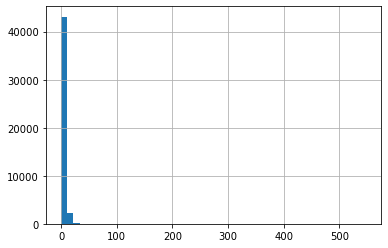

0

In [29]:
#After cleaning
metadata.loc[:,'popularity'].fillna(metadata.loc[:,'popularity'].mean(),inplace=True)
metadata.loc[:,'popularity'].hist(bins=50)
plt.show()
metadata.popularity.isnull().sum()

# Attribute: revenue

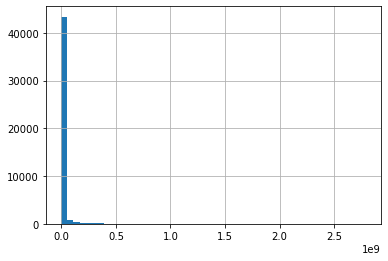

6

In [30]:
#Before cleaning
metadata.loc[:,'revenue'].hist(bins=50)
plt.show()
metadata.revenue.isnull().sum()

In [31]:
metadata.revenue.describe()

count    4.546000e+04
mean     1.120935e+07
std      6.433225e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [32]:
metadata.revenue.value_counts()

0.0            38052
12000000.0        20
10000000.0        19
11000000.0        19
2000000.0         18
               ...  
245724603.0        1
12212123.0         1
8203235.0          1
25900.0            1
12032983.0         1
Name: revenue, Length: 6863, dtype: int64

This attribute has too many values (84%) that are 0 (impossible value). Hence, revenue will be removed as a feature. 

In [33]:
#Feature removal from "metadata"
metadata = metadata.drop(['revenue'], axis=1)
#Checking to see if all the necessary columns are there
print("Shape")
print(metadata.shape)
print('Column Headers')
for col in metadata.columns:
    print(col)

Shape
(45466, 19)
Column Headers
genres
tmdbId
imdb_id
original_language
overview
popularity
production_companies
production_countries
release_date
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count
collectionId
collectionName


# Attribute: runtime

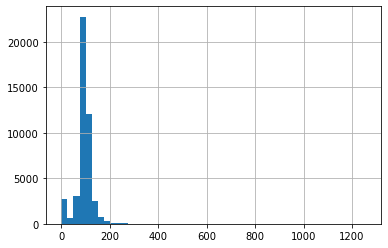

263

In [34]:
#Before cleaning
metadata.loc[:,'runtime'].hist(bins=50)
plt.show()
metadata.runtime.isnull().sum()

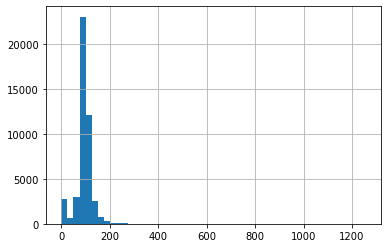

0

In [35]:
#After cleaning
metadata.loc[:,'runtime'].fillna(metadata.loc[:,'runtime'].mean(),inplace=True)
metadata.loc[:,'runtime'].hist(bins=50)
plt.show()
metadata.runtime.isnull().sum()

# Attribute: vote_average

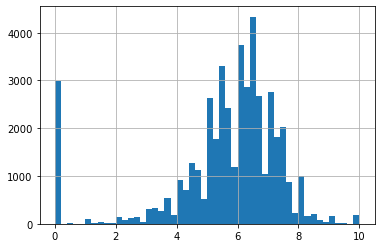

6

In [36]:
#Before Cleaning
metadata.loc[:,'vote_average'].hist(bins=50)
plt.show()
metadata.vote_average.isnull().sum()

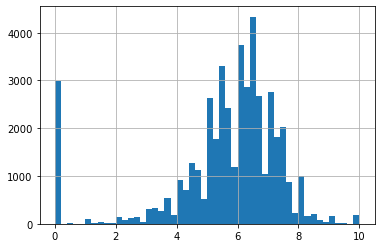

0

In [37]:
#After Cleaning
metadata.loc[:,'vote_average'].fillna(metadata.loc[:,'vote_average'].mean(),inplace=True)
metadata.loc[:,'vote_average'].hist(bins=50)
plt.show()
metadata.vote_average.isnull().sum()

# Attribute: vote_count

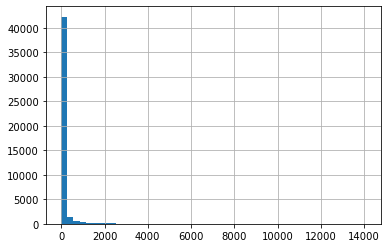

6

In [38]:
#Before cleaning
metadata.loc[:,'vote_count'].hist(bins=50)
plt.show()
metadata.vote_count.isnull().sum()

In [39]:
metadata.vote_count.describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [40]:
metadata.vote_count.value_counts()

1.0       3264
2.0       3132
0.0       2899
3.0       2787
4.0       2480
          ... 
4461.0       1
1085.0       1
1539.0       1
2487.0       1
3086.0       1
Name: vote_count, Length: 1820, dtype: int64

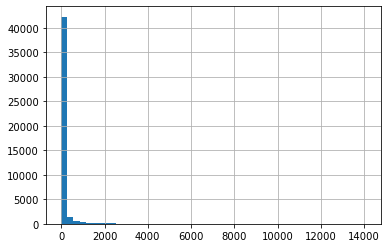

0

In [41]:
#After cleaning
metadata.loc[:,'vote_count'].fillna(metadata.loc[:,'vote_count'].mean(),inplace=True)
metadata.loc[:,'vote_count'].hist(bins=50)
plt.show()
metadata.vote_count.isnull().sum()

# Attribute : release_date

In [42]:
print (metadata['release_date'].dtype)
metadata['release_date'] = pd.to_datetime(metadata['release_date'],errors='coerce')
print (metadata['release_date'].dtype)
metadata['year'] = metadata['release_date'].apply(lambda x: str(x).split('-') [0] if x != np.nan else np.nan)
metadata['year'].head()
metadata.year.isnull().sum()
metadata = metadata.drop('release_date', axis=1)

object
datetime64[ns]


# Attribute : id(tmdbId) & imdb_id

In [43]:
#Before cleaning
print(metadata['imdb_id'].head(5))

0    tt0114709
1    tt0113497
2    tt0113228
3    tt0114885
4    tt0113041
Name: imdb_id, dtype: object


In [44]:
#After Cleaning
metadata['imdb_id'] = metadata['imdb_id'].str[3:]
print(metadata['imdb_id'].head(5))

0    114709
1    113497
2    113228
3    114885
4    113041
Name: imdb_id, dtype: object


In [45]:
metadata.tmdbId.isnull().sum()

0

In [46]:
metadata.imdb_id.isnull().sum()

17

In [47]:
# Missing IDs set to 0
metadata["imdb_id"] = metadata["imdb_id"].fillna(0)

In [48]:
tmdbID_of_missing_imdbID = metadata.loc[metadata['imdb_id'] == 0, 'tmdbId']

In [49]:
tmdbID_of_missing_imdbID

8966      36337
13757    200796
13821     75015
17382     36663
17510     47116
18959     28500
19322    118013
20806     15257
20937     55576
21916    293412
22987     45514
23744     30146
33753    324017
36955    161535
40809     65256
41832    430514
45070    439314
Name: tmdbId, dtype: object

In [50]:
links.tmdbId.isnull().sum()

13

In [51]:
links.imdbId.isnull().sum()

0

In [52]:
for x in tmdbID_of_missing_imdbID:
    print (links.loc[links['tmdbId'] == x, 'imdbId'])

Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)
Series([], Name: imdbId, dtype: int64)


C:\Users\Promita\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [53]:
metadata.shape

(45466, 19)

In [54]:
links.shape

(9125, 3)

links file size is small and has no entry for the missing values of imdb_id in metadata.

# Attribute : status

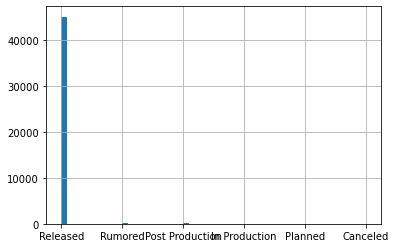

87

In [55]:
#Before cleaning
metadata.loc[:,'status'].hist(bins=50)
plt.show()
metadata.status.isnull().sum()

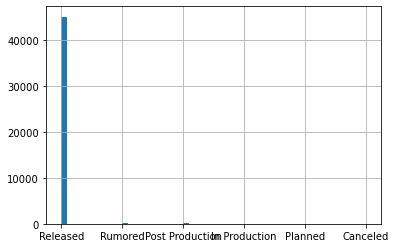

0

In [56]:
#After cleaning
metadata.loc[:,'status'].fillna('Released',inplace=True)
metadata.loc[:,'status'].hist(bins=50)
plt.show()
metadata.status.isnull().sum()

# Attribute : video

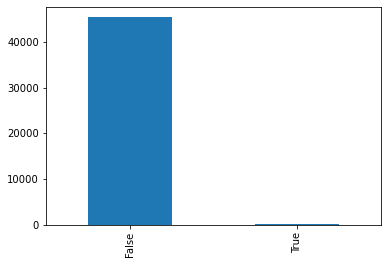

6

In [57]:
#Before cleaning
metadata['video'].value_counts().plot(kind='bar')
plt.show()
metadata.video.isnull().sum()

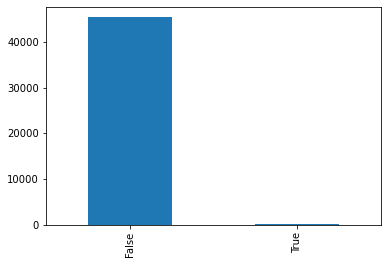

0

In [58]:
#After cleaning
metadata.loc[:,'video'].fillna(False,inplace=True)
metadata['video'].value_counts().plot(kind='bar')
plt.show()
metadata.video.isnull().sum()

# Attribute: original_language

In [59]:
metadata['original_language'].isnull().sum()

11

In [60]:
metadata['original_language'].value_counts()

en       32269
fr        2438
it        1529
ja        1350
de        1080
         ...  
104.0        1
qu           1
eo           1
82.0         1
zu           1
Name: original_language, Length: 92, dtype: int64

In [61]:
metadata['original_language'].fillna('en',inplace=True)

In [62]:
metadata['original_language'].isnull().sum()

0

# Attribute: overview

In [63]:
metadata['overview'].isnull().sum()

954

In [64]:
metadata['overview'].nunique()

44307

In [65]:
# Missing values set to "unknown"
metadata.loc[:,'overview'].fillna("unknown",inplace=True)
metadata['overview'].isnull().sum()

0

# Attribute: tagline

In [66]:
metadata['tagline'].isnull().sum()

25054

In [67]:
metadata['tagline'].nunique()

20283

In [68]:
# Missing values set to "unknown"
metadata.loc[:,'tagline'].fillna("unknown",inplace=True)
metadata['tagline'].isnull().sum()

0

# Attribute: title

In [69]:
metadata['title'].isnull().sum()

6

In [70]:
metadata['title'].nunique()

42277

It is not possible to work with movies without titles. Hence these movies will be dropped.

In [71]:
metadata = metadata.dropna(axis=0, subset=['title'])

In [72]:
metadata['title'].isnull().sum()

0

# Attributes: spoken_languages

In [73]:
#Print spoken languages of the first movie
print(metadata.iloc[0]['spoken_languages'])

[{'iso_639_1': 'en', 'name': 'English'}]


In [74]:
#Convert all NaN into stringified empty lists
metadata['spoken_languages'] = metadata['spoken_languages'].fillna('[]')

In [75]:
#Apply literal_eval to convert to the list object
metadata['spoken_languages'] = metadata['spoken_languages'].apply(literal_eval)

In [76]:
#Convert list of dictionaries to a list of strings
metadata['spoken_languages'] = metadata['spoken_languages'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [77]:
metadata['spoken_languages'] = metadata['spoken_languages'].apply(lambda x: ','.join(map(str, x)))

In [78]:
#cleaning missing values by filling them with the most frequent values

In [79]:
metadata['spoken_languages'].isnull().sum()

0

In [80]:
metadata.spoken_languages.value_counts()

English                                            22395
                                                    3952
Français                                            1853
日本語                                                 1289
Italiano                                            1218
                                                   ...  
български език,English,Français,Pусский,Español        1
English,Magyar,Română,Deutsch                          1
普通话,English,Pусский                                    1
English,Français,ภาษาไทย                               1
ελληνικά,English,Türkçe                                1
Name: spoken_languages, Length: 1842, dtype: int64

In [81]:
metadata.spoken_languages[metadata['spoken_languages'].str.len() == 0].count()

3952

In [82]:
metadata.spoken_languages[metadata['spoken_languages'].str.len() == 0] = 'English'

<ipython-input-82-f4f6c58a04b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.spoken_languages[metadata['spoken_languages'].str.len() == 0] = 'English'


In [83]:
metadata.spoken_languages[metadata['spoken_languages'].str.len() == 0].count()

0

In [84]:
metadata.spoken_languages.value_counts()

English                          26347
Français                          1853
日本語                               1289
Italiano                          1218
Español                            902
                                 ...  
English,Magyar,Română,Deutsch        1
普通话,English,Pусский                  1
Bahasa melayu,普通话,English            1
English,日本語,हिन्दी                   1
Dansk,Norsk,,svenska                 1
Name: spoken_languages, Length: 1841, dtype: int64

# Attribute: genres

In [85]:
#Print genres of the first movie
print(metadata.iloc[0]['genres'])

[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]


In [86]:
#Convert all NaN into stringified empty lists
metadata['genres'] = metadata['genres'].fillna('[]')

In [87]:
#Apply literal_eval to convert to the list object
metadata['genres'] = metadata['genres'].apply(literal_eval)

In [88]:
#Convert list of dictionaries to a list of strings
metadata['genres'] = metadata['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [89]:
metadata['genres'] = metadata['genres'].apply(lambda x: ','.join(map(str, x)))

In [90]:
metadata.genres.isnull().sum()

0

In [91]:
metadata.genres.value_counts()

Drama                                              5000
Comedy                                             3621
Documentary                                        2723
                                                   2442
Drama,Romance                                      1301
                                                   ... 
War,Thriller,Comedy,Drama,Mystery                     1
Crime,Drama,Mystery,Thriller,Comedy                   1
Family,Animation,Music                                1
Crime,Drama,Foreign,History,Thriller                  1
Fantasy,Animation,Horror,Action,Science Fiction       1
Name: genres, Length: 4065, dtype: int64

In [92]:
metadata.genres[metadata['genres'].str.len() == 0].count()

2442

In [93]:
metadata.genres[metadata['genres'].str.len() == 0] = 'Drama'

<ipython-input-93-32203c30e1be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.genres[metadata['genres'].str.len() == 0] = 'Drama'


In [94]:
metadata.genres[metadata['genres'].str.len() == 0].count()

0

In [95]:
metadata.genres.value_counts()

Drama                                  7442
Comedy                                 3621
Documentary                            2723
Drama,Romance                          1301
Comedy,Drama                           1135
                                       ... 
Horror,Adventure                          1
Horror,Comedy,Music                       1
Fantasy,Adventure,Animation               1
Romance,Music,TV Movie,Comedy             1
Action,Crime,Horror,Science Fiction       1
Name: genres, Length: 4064, dtype: int64

# Attribute: production_companies

In [96]:
#Print production_companies of the first movie
print(metadata.iloc[0]['production_companies'])
#Convert all NaN into stringified empty lists
metadata['production_companies'] = metadata['production_companies'].fillna('[]')
#Apply literal_eval to convert to the list object
metadata['production_companies'] = metadata['production_companies'].apply(literal_eval)
#Convert list of dictionaries to a list of strings
metadata['production_companies'] = metadata['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

[{'name': 'Pixar Animation Studios', 'id': 3}]


In [97]:
print(metadata.production_companies.isnull().sum())

0


In [98]:
metadata['production_companies'] = metadata['production_companies'].apply(lambda x: ','.join(map(str, x)))

In [99]:
metadata['production_companies'].isnull().sum()

0

In [100]:
metadata.production_companies.value_counts()

                                                                                      11875
Metro-Goldwyn-Mayer (MGM)                                                               742
Warner Bros.                                                                            540
Paramount Pictures                                                                      505
Twentieth Century Fox Film Corporation                                                  439
                                                                                      ...  
Metro-Goldwyn-Mayer (MGM),Jerry Thorpe Productions                                        1
Madhouse,Kadokawa Haruki Jimusho,Kadokawa Shoten Publishing Co.,Project Team Argos        1
Vertigo Entertainment,Energy Entertainment,RatPac-Dune Entertainment                      1
Snow Globe Productions                                                                    1
Avalanche Productions,EuropaCorp,Seven Productions                              

In [101]:
metadata.production_companies[metadata['production_companies'].str.len() == 0].count()

11875

In [102]:
metadata.production_companies[metadata['production_companies'].str.len() == 0] = 'Metro-Goldwyn-Mayer (MGM)'

<ipython-input-102-15c83c5cb368>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.production_companies[metadata['production_companies'].str.len() == 0] = 'Metro-Goldwyn-Mayer (MGM)'


In [103]:
metadata.production_companies[metadata['production_companies'].str.len() == 0].count()

0

In [104]:
metadata.production_companies.value_counts()

Metro-Goldwyn-Mayer (MGM)                                                                                                                                            12617
Warner Bros.                                                                                                                                                           540
Paramount Pictures                                                                                                                                                     505
Twentieth Century Fox Film Corporation                                                                                                                                 439
Universal Pictures                                                                                                                                                     320
                                                                                                                                                 

# Attribute: production_countries

In [105]:
#Print production_countries of the first movie
print(metadata.iloc[0]['production_countries'])

[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [106]:
#Print production_countries of the first movie
print(metadata.iloc[0]['production_countries'])
#Convert all NaN into stringified empty lists
metadata['production_countries'] = metadata['production_countries'].fillna('[]')
#Apply literal_eval to convert to the list object
metadata['production_countries'] = metadata['production_countries'].apply(literal_eval)
#Convert list of dictionaries to a list of strings
metadata['production_countries'] = metadata['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [107]:
print(metadata.production_countries.isnull().sum())

0


In [108]:
metadata['production_countries'] = metadata['production_countries'].apply(lambda x: ','.join(map(str, x)))

In [109]:
metadata['production_countries'].isnull().sum()

0

In [110]:
metadata.production_countries.value_counts()

United States of America                                                 17851
                                                                          6282
United Kingdom                                                            2238
France                                                                    1654
Japan                                                                     1356
                                                                         ...  
Botswana,United States of America,South Africa                               1
France,India,United States of America                                        1
Czech Republic,France,Germany,United Kingdom,United States of America        1
East Germany,Czech Republic                                                  1
United States of America,Belgium,Netherlands,United Kingdom                  1
Name: production_countries, Length: 2390, dtype: int64

In [111]:
metadata.production_countries[metadata['production_countries'].str.len() == 0].count()

6282

In [112]:
metadata.production_countries[metadata['production_countries'].str.len() == 0] = 'United States of America'

<ipython-input-112-252ca0656874>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata.production_countries[metadata['production_countries'].str.len() == 0] = 'United States of America'


In [113]:
metadata.production_countries[metadata['production_countries'].str.len() == 0].count()

0

In [114]:
metadata.production_countries.value_counts()

United States of America                                                 24133
United Kingdom                                                            2238
France                                                                    1654
Japan                                                                     1356
Italy                                                                     1030
                                                                         ...  
Botswana,United States of America,South Africa                               1
France,India,United States of America                                        1
Czech Republic,France,Germany,United Kingdom,United States of America        1
East Germany,Czech Republic                                                  1
Cambodia                                                                     1
Name: production_countries, Length: 2389, dtype: int64

# Dropping Duplicates

In [115]:
metadata.duplicated().sum()

17

In [116]:
metadata[metadata.duplicated()]

,genres,tmdbId,imdb_id,original_language,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collectionId,collectionName,year
1465,"Drama,Romance",105045,111613,de,"East-Berlin, 1961, shortly after the erection ...",0.122178,"Studio Babelsberg,Centre National de la Cinéma...",Germany,115.0,Deutsch,Released,"A love, a hope, a wall.",The Promise,False,5.0,1.0,-99,unknown,1995
9165,"Crime,Drama,Thriller",5511,062229,fr,Hitman Jef Costello is a perfectionist who alw...,9.091288,"Fida cinematografica,Compagnie Industrielle et...","France,Italy",105.0,Français,Released,There is no solitude greater than that of the ...,Le Samouraï,False,7.9,187.0,-99,unknown,1967
9327,"Adventure,Animation,Drama,Action,Foreign",23305,295682,en,"In feudal India, a warrior (Khan) who renounce...",1.967992,Filmfour,"France,Germany,India,United Kingdom",86.0,हिन्दी,Released,unknown,The Warrior,False,6.3,15.0,-99,unknown,2001
13375,"Thriller,Mystery",141971,180333,fi,Recovering from a nail gun shot to the head an...,0.411949,Filmiteollisuus Fine,Finland,108.0,suomi,Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0,-99,unknown,2008
16764,"Thriller,Mystery",141971,180333,fi,Recovering from a nail gun shot to the head an...,0.411949,Filmiteollisuus Fine,Finland,108.0,suomi,Released,Which one is the first to return - memory or t...,Blackout,False,6.7,3.0,-99,unknown,2008
21165,"Fantasy,Drama,Science Fiction",119916,080000,en,"Prospero, the true Duke of Milan is now living...",0.000018,Metro-Goldwyn-Mayer (MGM),United States of America,123.0,English,Released,unknown,The Tempest,False,0.0,0.0,-99,unknown,1980
21854,"Drama,Science Fiction,Animation",152795,821641,en,More than two decades after catapulting to sta...,8.534039,"Pandora Filmproduktion,Entre Chien et Loup,Opu...","Belgium,France,Germany,Israel,Luxembourg,Poland",122.0,English,Released,unknown,The Congress,False,6.4,165.0,-99,unknown,2013
22151,"Action,Horror,Science Fiction",18440,499456,en,When a comet strikes Earth and kicks up a clou...,1.436085,Metro-Goldwyn-Mayer (MGM),United States of America,89.0,English,Released,unknown,Days of Darkness,False,5.0,5.0,-99,unknown,2007
23044,Drama,25541,327820,da,Former Danish servicemen Lars and Jimmy are th...,2.587911,Metro-Goldwyn-Mayer (MGM),"Sweden,Denmark",90.0,Dansk,Released,unknown,Brotherhood,False,7.1,21.0,-99,unknown,2009
24844,"Comedy,Drama",11115,446676,en,As an ex-gambler teaches a hot-shot college ki...,6.880365,"Andertainment Group,Crescent City Pictures,Tag...",United States of America,85.0,English,Released,unknown,Deal,False,5.2,22.0,-99,unknown,2008


In [117]:
metadata = metadata.drop_duplicates()

In [118]:
metadata.duplicated().sum()

0

In [119]:
metadata.tmdbId.duplicated().sum()

13

In [120]:
metadata = metadata.drop_duplicates(subset=['tmdbId'])

In [121]:
metadata.tmdbId.duplicated().sum()

0

In [122]:
metadata.imdb_id.duplicated().sum()

667

In [123]:
metadata = metadata.drop_duplicates(subset=['imdb_id'])

In [124]:
metadata.imdb_id.duplicated().sum()

0

# Exporting the cleaned dataframes to csv files

In [125]:
ratings.to_csv("ratings_filtered.csv", index=False)

In [126]:
list(metadata.columns.values)

['genres',
 'tmdbId',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count',
 'collectionId',
 'collectionName',
 'year']

In [127]:
metadata = metadata.reindex(sorted(metadata.columns),axis=1)

In [128]:
list(metadata.columns.values)

['collectionId',
 'collectionName',
 'genres',
 'imdb_id',
 'original_language',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'tmdbId',
 'video',
 'vote_average',
 'vote_count',
 'year']

In [129]:
metadata.to_csv("metadata_filtered.csv", index=False)